In [1]:
import numpy as np
import matplotlib.pyplot as plt
from laser.abcd import Beampath, GaussianBeampath
%matplotlib inline

# Example with all types of elements

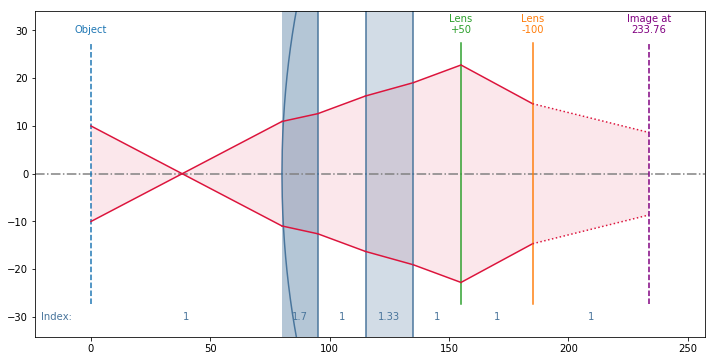

In [2]:
# Initialise input
bp = Beampath(10, np.deg2rad(-15))

# Add elements
bp.add_freespace(80)

# Window
bp.add_interface(1.7, 100)
bp.add_freespace(15)
bp.add_interface(1)

bp.add_freespace(20)

bp.add_thicklens(1.33, 20) # a thick lens is the same as interface > propagation > interface

bp.add_freespace(20)
bp.add_thinlens(50)
bp.add_freespace(30)
bp.add_thinlens(-100)

# Calculate image position 
bp.add_image()

# Display the beam path
bp.plot()

## Modify beampath after construction

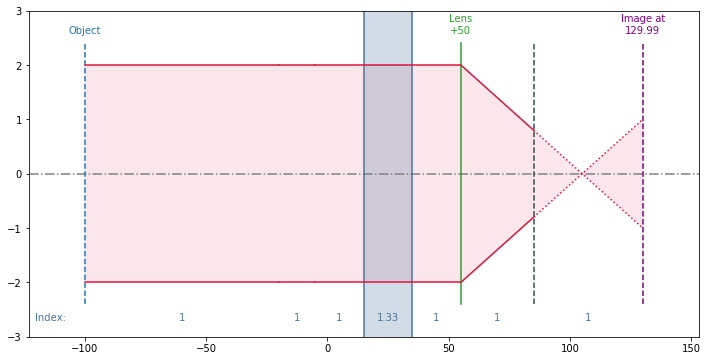

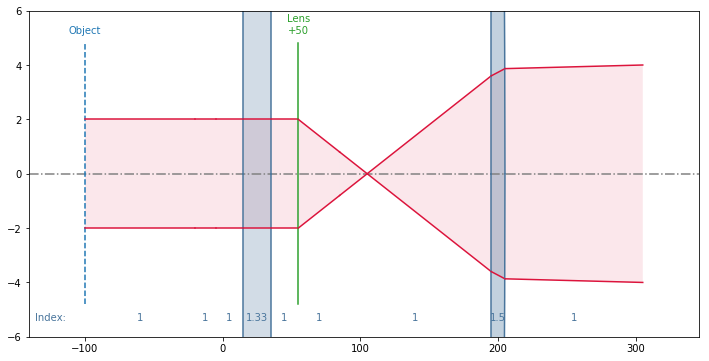

In [3]:
# Edit the beam path after it was built

# Edit the object
bp.edit_object(radius = 2, angle=0, position = -100)
# Remove first thicklens
bp.remove_element([2,4])
# Remove last element
bp.pop()
# Replot
bp.plot()

# Add a beampath
bp_add = Beampath()
bp_add.add_freespace(110)
bp_add.add_thicklens(1.5, 10, np.inf, -50)
bp_add.add_freespace(100)
bp.extend(bp_add)
# Remove the image from the calculations
bp.remove_image()
# replot
bp.plot()


# Gaussian beam propagation

radius ABCD: 40.00 um
radius Gaussian: 109.43 um


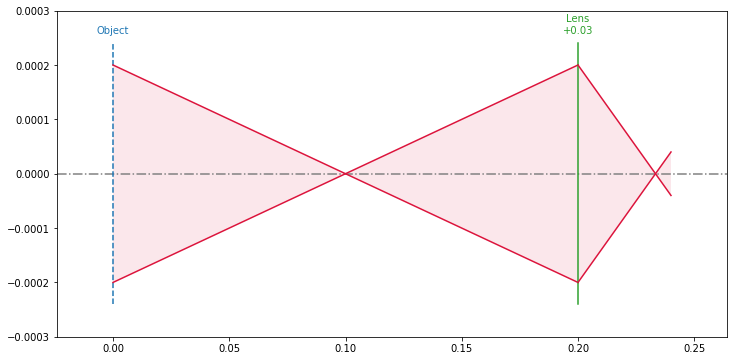

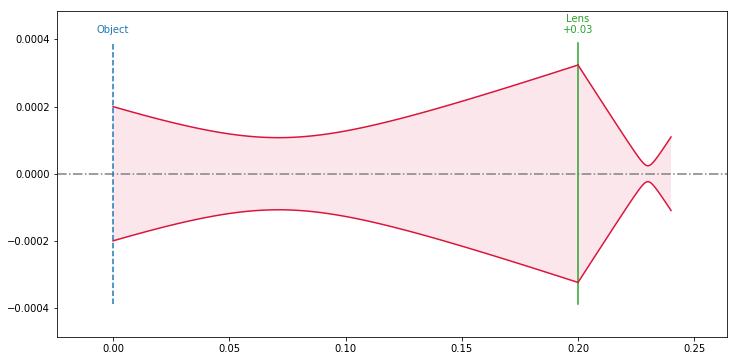

In [4]:
bp_abcd = Beampath(radius=0.2e-3,  angle=-0.002)
bp_abcd.add_freespace(0.2)
bp_abcd.add_thinlens(0.025)
bp_abcd.add_freespace(0.04)
bp_abcd.plot()

bp_gauss = GaussianBeampath(radius=bp_abcd.radius[0],  angle=bp_abcd.angle[0], wavelength = 800e-9)
bp_gauss.add_freespace(0.2)
bp_gauss.add_thinlens(0.025)
bp_gauss.add_freespace(0.04)
bp_gauss.plot()

print('radius ABCD: %.2f um' % np.abs(1e6*bp_abcd.radius[-1]))
print('radius Gaussian: %.2f um' % (1e6*bp_gauss.radius[-1]))

# Telescope from Thorlabs lenses

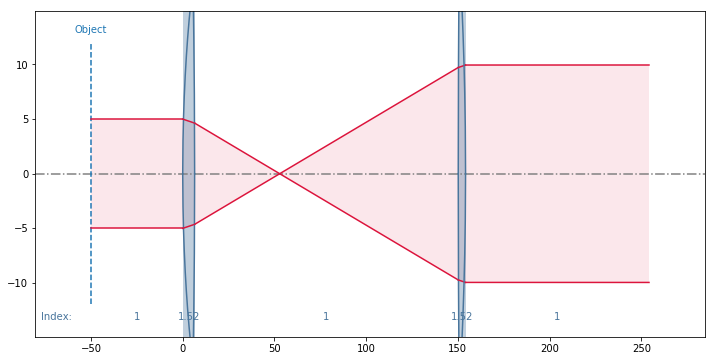

In [5]:
bp2 = Beampath(radius=5, angle=0, index=1, position=-50) # all 4 input parameters
bp2.add_freespace(50)
bp2.add_thicklens(1.5168, 6.5, 30.06, -172.0)
bp2.add_freespace(46.4+97.3)
bp2.add_thicklens(1.5168, 4, 353.3, -60.03)
bp2.add_freespace(100)
bp2.plot()

# Display measured parameters

Radius:  [ 0.         10.         10.         11.58415842 11.58415842 12.70415842
 12.70415842  0.          0.        ] 

Angle:  [0.25       0.25       0.07920792 0.07920792 0.112      0.112
 0.112      0.112      0.112     ] 

Index:  [1.    1.    1.414 1.414 1.    1.    1.    1.    1.   ] 

Position:  [  0.          40.          40.          60.          60.
  70.          70.         -43.42998586 -43.42998586] 

ABCD matrix:  [[ 2.23214286  0.        ]
 [-0.0138      0.448     ]]


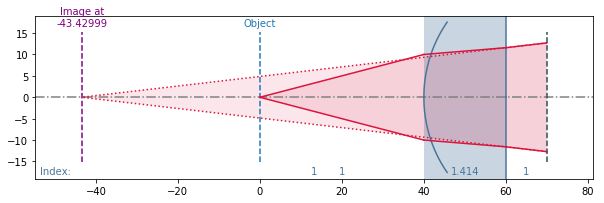

In [6]:
bp3 = Beampath(0,0.25)
bp3.add_freespace(40)
bp3.add_thicklens(1.414, 20, radius_in=30)
bp3.add_freespace(10)
bp3.add_image()

# "plot_digit" keyword argument to change the number
# of displayed decimals (trailing zeros are trimmed)
# "figsize" to change the figure size (expect a tuple, default is (12,6))
bp3.plot(plot_digit=5, figsize=(10,3))

# Access to the beam parameter along the path, and the total ABCD matrix
print('Radius: ', bp3.radius, '\n')
print('Angle: ', bp3.angle, '\n')
print('Index: ', bp3.index, '\n')
print('Position: ', bp3.position, '\n')
print('ABCD matrix: ', bp3.M)

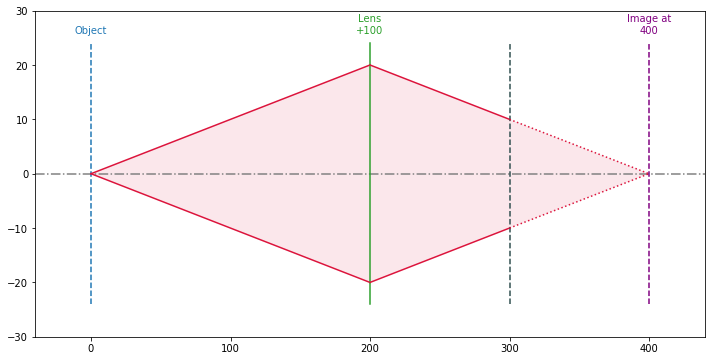

In [7]:
bp4 = Beampath(0, 0.1) # point source by default
bp4.add_freespace(200)
bp4.add_thinlens(100) # image at infinity (object in focal plane of lens)
bp4.add_freespace(100) # Add a dummy exit plane (grey dashes)
bp4.add_image()
bp4.plot()